In [1]:
import tensorflow as tf
import numpy as np

# Load the trained models
cnn_model = tf.keras.models.load_model('trained_plant_disease_model.keras')
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 13)                  │          19,513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,415,713 (89.32 MB)

 Trainable params: 7,805,237 (29.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,610,476 (59.55 MB)

In [67]:
import tensorflow as tf

# Set the path to your test directory
test_dir = 'OneDrive/Desktop/temp_data/rt/test'

# Load the test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(128, 128),  # Adjust to the input size of your models
    batch_size=32,  # You can change the batch size
    shuffle=False  # Do not shuffle to keep the order for evaluation
)


Found 10 files belonging to 3 classes.


In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Average, GlobalAveragePooling2D, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'Downloads/tempppp/train',  
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_set = validation_datagen.flow_from_directory(
    'Downloads/tempppp/valid',  
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Build CNN model
def build_cnn_model(input_shape=(128, 128, 3)):
    cnn = Sequential()
    cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
    cnn.add(MaxPooling2D(pool_size=2))
    cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    cnn.add(MaxPooling2D(pool_size=2))
    cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
    cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
    cnn.add(MaxPooling2D(pool_size=2))
    cnn.add(Flatten())
    cnn.add(Dense(512, activation='relu'))
    cnn.add(Dense(13, activation='softmax'))
    return cnn

# Build MobileNet model
def build_mobilenet_model(input_shape=(128, 128, 3)):
    mobilenet_base = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in mobilenet_base.layers:
        layer.trainable = False
    mobilenet = Sequential(name='mobilenet_model')
    mobilenet.add(mobilenet_base)
    mobilenet.add(GlobalAveragePooling2D())
    mobilenet.add(Dense(512, activation='relu'))
    mobilenet.add(Dense(13, activation='softmax'))  # Assuming 13 classes
    return mobilenet

# Build EfficientNet model
def build_efficientnet_model(input_shape=(128, 128, 3)):
    efficientnet_base = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in efficientnet_base.layers:
        layer.trainable = False
    efficientnet = Sequential(name='efficientnet_model')
    efficientnet.add(efficientnet_base)
    efficientnet.add(GlobalAveragePooling2D())
    efficientnet.add(Dense(512, activation='relu'))
    efficientnet.add(Dense(13, activation='softmax'))  # Assuming 13 classes
    return efficientnet

# Build ensemble model
def build_ensemble_model():
    cnn_model = build_cnn_model()
    mobilenet_model = build_mobilenet_model()
    efficientnet_model = build_efficientnet_model()
    
    model_input = Input(shape=(128, 128, 3))
    cnn_output = cnn_model(model_input)
    mobilenet_output = mobilenet_model(model_input)
    efficientnet_output = efficientnet_model(model_input)
    
    ensemble_output = Average()([cnn_output, mobilenet_output, efficientnet_output])
    
    ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble_model')
    
    ensemble_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )
    return ensemble_model

# Build and train the ensemble model
ensemble_model = build_ensemble_model()

# Callbacks for learning rate adjustment and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = ensemble_model.fit(
    training_set,
    validation_data=validation_set,
    epochs=50,
    callbacks=[lr_scheduler, early_stopping]
)

# Evaluate the ensemble model
eval_result = ensemble_model.evaluate(validation_set)
print(f"Validation Loss: {eval_result[0]}, Validation Accuracy: {eval_result[1]}, Precision: {eval_result[2]}, Recall: {eval_result[3]}")


Found 156 images belonging to 13 classes.
Found 156 images belonging to 13 classes.
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.1441 - loss: 2.6044 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_accuracy: 0.3462 - val_loss: 2.1303 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4844 - loss: 1.9518 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_accuracy: 0.5833 - val_loss: 1.7609 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7090 - loss: 1.5373 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 - val_accuracy: 0.5321 - val_loss: 1.5224 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6884 - loss: 1.2972 - precision_10: 0.0000e+00 - recall_10: 0.0000e+00 

In [61]:
# Adjusting to capture all returned metrics
results = ensemble_model.evaluate(training_set)

# Unpack according to the number of returned values
train_loss, train_acc, train_precision, train_recall = results

# Print the required metrics
print('Training Loss:', train_loss)
print('Training Accuracy:', train_acc)
print('Training Precision:', train_precision)
print('Training Recall:', train_recall)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - accuracy: 0.9180 - loss: 0.7705 - precision_10: 1.0000 - recall_10: 0.3880
Training Loss: 0.7969313263893127
Training Accuracy: 0.9038461446762085
Training Precision: 1.0
Training Recall: 0.3461538553237915


In [62]:
# Adjust to capture all returned metrics
results = ensemble_model.evaluate(validation_set)

# Unpack according to the number of returned metrics
val_loss, val_acc, val_precision, val_recall = results

# Print the metrics you need
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_acc)
print('Validation Precision:', val_precision)
print('Validation Recall:', val_recall)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 448ms/step - accuracy: 0.6904 - loss: 0.9712 - precision_10: 0.9513 - recall_10: 0.2595
Validation Loss: 0.9794264435768127
Validation Accuracy: 0.6858974099159241
Validation Precision: 0.9756097793579102
Validation Recall: 0.25641027092933655


In [64]:
ensemble_model.save("ensemble_new_2.h5")

In [65]:
import json

# Extract the history dictionary
history_dict = history.history

# Save it as JSON
with open('ensemble_hist_new_2.json', 'w') as f:
    json.dump(history_dict, f)

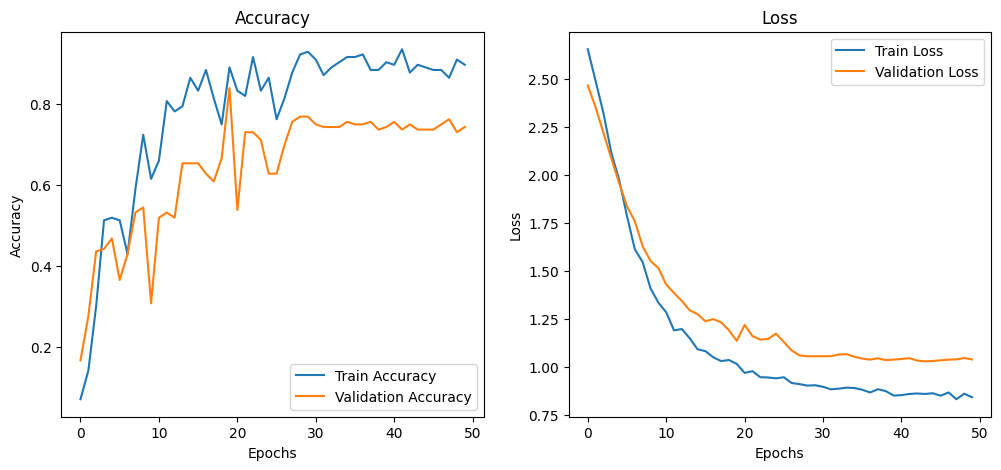

In [4]:
import json
import matplotlib.pyplot as plt

# Load training history from the JSON file
with open('ensemble_hist_new.json', 'r') as f:
    training_history = json.load(f)

# Plot accuracy and loss
def plot_accuracy_loss(history):
    # Accuracy plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot accuracy and loss
plot_accuracy_loss(training_history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


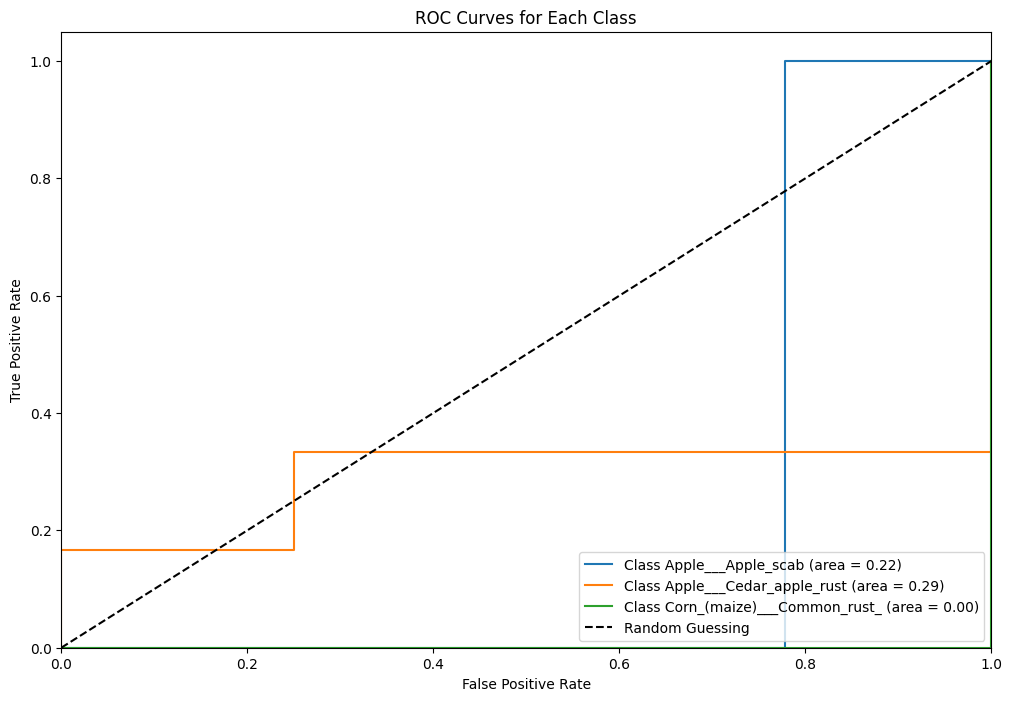

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Function to plot ROC curves
def plot_roc_curves(model, test_generator):
    # Get the true labels and predicted probabilities
    y_true = np.concatenate([y for x, y in test_generator], axis=0)
    y_score = model.predict(test_generator)

    # Binarize the labels for multiclass ROC
    y_true_bin = label_binarize(y_true, classes=[i for i in range(len(test_generator.class_names))])

    # Plot ROC curve for each class
    plt.figure(figsize=(12, 8))
    for i in range(len(test_generator.class_names)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {test_generator.class_names[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Each Class')
    plt.legend(loc='lower right')
    plt.show()

# Call the function to plot ROC curves
plot_roc_curves(ensemble_model, test_data)


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Downloads/tempppp/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)


Found 156 files belonging to 13 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)']


In [163]:
disease_medicine_dict = {
    'Apple___Apple_scab': 'Fungicides (e.g., Myclobutanil, Chlorothalonil)',
    'Apple___Black_rot': 'Fungicides (e.g., Pyraclostrobin, Tebuconazole)',
    'Apple___Cedar_apple_rust': 'Fungicides (e.g., Triadimefon, Myclobutanil)',
    'Apple___healthy': 'No treatment needed; ensure good cultural practices.',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 'Fungicides (e.g., Azoxystrobin, Pyraclostrobin)',
    'Corn_(maize)___Common_rust_': 'Fungicides (e.g., Propiconazole, Tebuconazole)',
    'Corn_(maize)___Northern_Leaf_Blight': 'Fungicides (e.g., Chlorothalonil, Carboxin)',
    'Corn_(maize)___healthy': 'No treatment needed; maintain healthy soil and crop rotation.',
    'Grape___Black_rot': 'Fungicides (e.g., Mancozeb, Copper-based fungicides)',
    'Grape___Esca_(Black_Measles)': 'Pruning infected wood; no specific fungicide available.',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 'Fungicides (e.g., Myclobutanil, Sulfur)',
    'Grape___healthy': 'No treatment needed; ensure proper vine management and care.',
    'Orange___Haunglongbing_(Citrus_greening)': 'Insecticides for aphid control; no cure available; remove infected trees.'
}


In [104]:
ensemble_model.summary()

Model: "ensemble_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_63 (InputLayer)   │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential_10 (Sequential)    │ (None, 13)                │      13,139,245 │ input_layer_63[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mobilenet_model (Sequential)  │ (None, 13)                │       3,760,333 │ input_layer_63[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ efficientnet_model            │ (None, 13)                │       4,712,112 │ input_layer_63[0][0]       │
│ (Sequential)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ average_9 (Average)           │ (None, 13)                │               0 │ sequential_10[0][0],       │
│                               │                           │                 │ mobilenet_model[0][0],     │
│                               │                           │                 │ efficientnet_model[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 50,278,202 (191.80 MB)

 Trainable params: 14,333,255 (54.68 MB)

 Non-trainable params: 7,278,435 (27.77 MB)

 Optimizer params: 28,666,512 (109.35 MB)

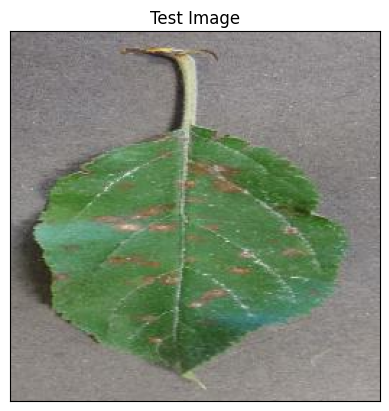

In [158]:
#Test Image Visualization
import cv2

image_path = 'temp_data/rt/test/AppleCedarRust2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [159]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = ensemble_model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [160]:
print(predictions)


[[0.03592933 0.0577354  0.12752753 0.34906328 0.04767914 0.01546852
  0.02059026 0.07073369 0.03958252 0.03213691 0.0339773  0.03497609
  0.13460004]]


In [161]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

3


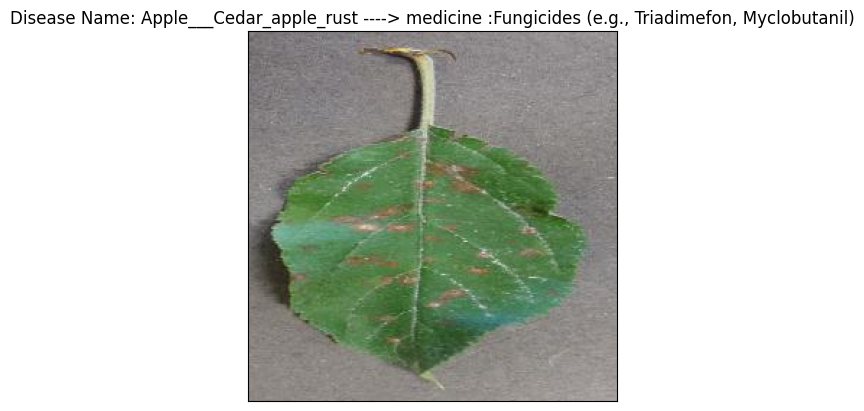

In [166]:
# Displaying the disease prediction
model_prediction = class_name[result_index-1]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction} ----> medicine :{disease_medicine_dict[model_prediction]}")
plt.xticks([])
plt.yticks([])
plt.show()